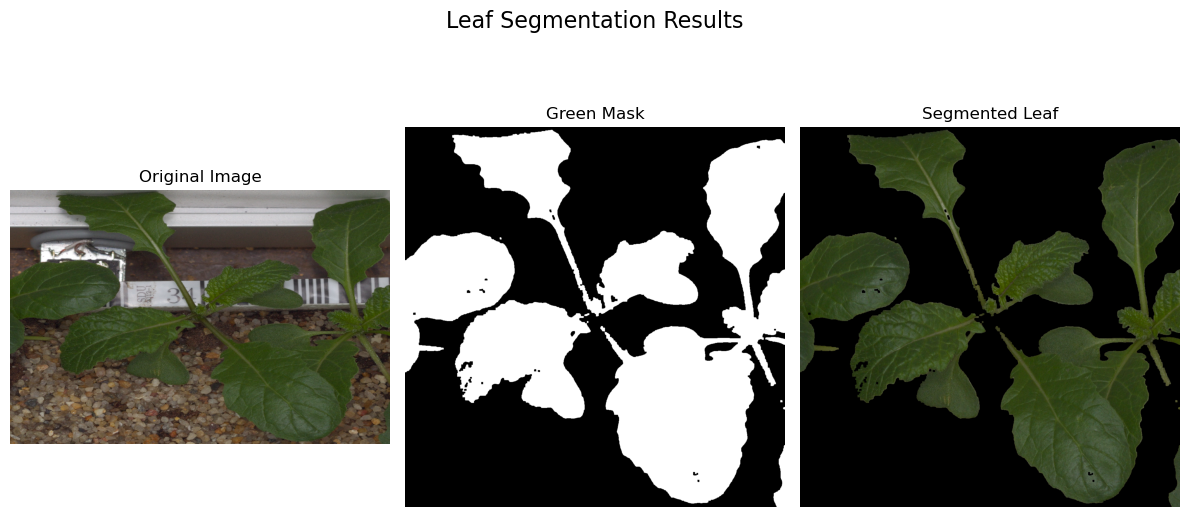

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r'Leaf/51b461a5e.png'
image = cv2.imread(image_path)

# Check if image is loaded
if image is None:
    print("Error: Image not found or cannot be opened.")
    exit()

# Step 2: Resize image


# Step 3: Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Step 4: Define green color range
lower_green = np.array([30, 50, 50])
upper_green = np.array([90, 255, 255])

# Step 5: Create mask
mask = cv2.inRange(hsv, lower_green, upper_green)

# Step 6: Morphological operations
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Step 7: Apply mask
segmented = cv2.bitwise_and(image, image, mask=mask)

# Step 8: Display using matplotlib
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
segmented_rgb = cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(12,6))
fig.suptitle("Leaf Segmentation Results", fontsize=16)

ax[0].imshow(original_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(mask, cmap='gray')
ax[1].set_title("Green Mask")
ax[1].axis("off")

ax[2].imshow(segmented_rgb)
ax[2].set_title("Segmented Leaf")
ax[2].axis("off")

plt.tight_layout()
plt.show()


Segmented Region Area (in pixels): 102150
Number of detected leaves (components): 6
Leaf 1: Area = 511.00, Bounding Box = (x:582, y:338, w:18, h:62)
Leaf 2: Area = 38.50, Bounding Box = (x:272, y:159, w:8, h:7)
Leaf 3: Area = 30873.00, Bounding Box = (x:0, y:111, w:291, h:196)
Leaf 4: Area = 8975.50, Bounding Box = (x:280, y:110, w:182, h:89)
Leaf 5: Area = 48805.00, Bounding Box = (x:317, y:13, w:283, h:383)
Leaf 6: Area = 10801.00, Bounding Box = (x:78, y:3, w:193, h:147)


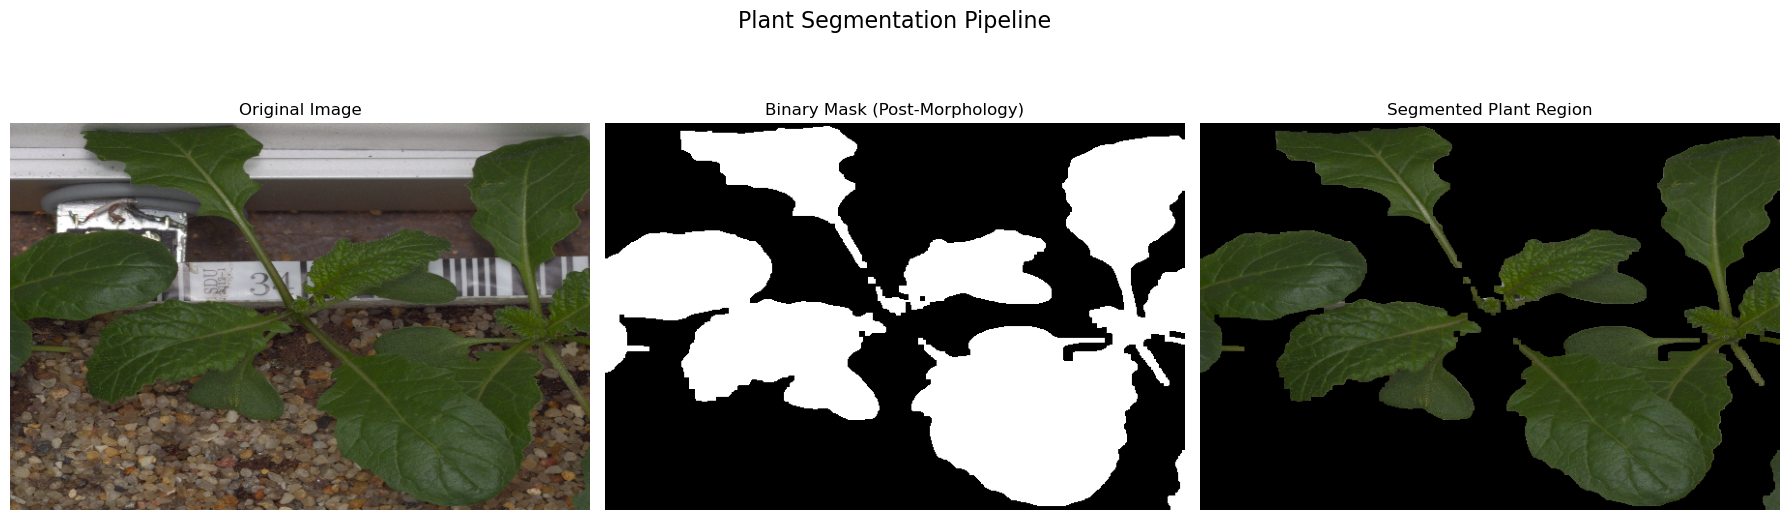

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path =r'Leaf/51b461a5e.png'
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found.")
    exit()

image = cv2.resize(image, (600, 400))
original = image.copy()

# 1. Grayscale Conversion
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. Gaussian Blurring
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 3. Convert to HSV for color thresholding
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 4. Color Thresholding to isolate green areas
lower_green = np.array([30, 50, 50])
upper_green = np.array([90, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)

# 5. Morphological Operations
kernel = np.ones((5, 5), np.uint8)
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)

# 6. Contour Detection
contours, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 7. Mask Generation and ROI Extraction
segmentation_mask = np.zeros_like(mask_clean)
cv2.drawContours(segmentation_mask, contours, -1, 255, thickness=cv2.FILLED)
segmented = cv2.bitwise_and(image, image, mask=segmentation_mask)

# 8. Segmentation Validation
# Compute metrics like area
total_area = np.sum(segmentation_mask > 0)
print(f"Segmented Region Area (in pixels): {total_area}")

# 9. Leaf Counting
num_labels, labels_im = cv2.connectedComponents(segmentation_mask)
leaf_count = num_labels - 1  # Subtract background
print(f"Number of detected leaves (components): {leaf_count}")

# 10. Feature Extraction per contour
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(contour)
    print(f"Leaf {i + 1}: Area = {area:.2f}, Bounding Box = (x:{x}, y:{y}, w:{w}, h:{h})")

# 11. Visualization
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
segmented_rgb = cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Plant Segmentation Pipeline", fontsize=16)

ax[0].imshow(original_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(mask_clean, cmap='gray')
ax[1].set_title("Binary Mask (Post-Morphology)")
ax[1].axis("off")

ax[2].imshow(segmented_rgb)
ax[2].set_title("Segmented Plant Region")
ax[2].axis("off")

plt.tight_layout()
plt.show()

# 12. Save outputs (optional)
cv2.imwrite("output_segmented.png", segmented)
cv2.imwrite("output_mask.png", mask_clean)


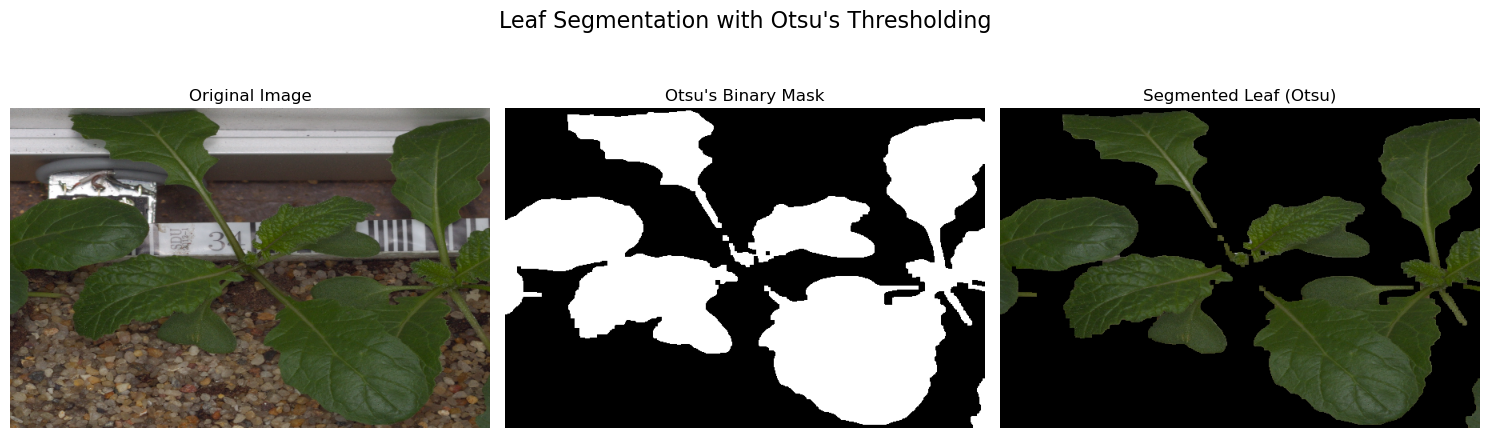

In [17]:
#otsu's

import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r'Leaf/51b461a5e.png'
image = cv2.imread(image_path)

# Check if image is loaded
if image is None:
    print("Error: Image not found or cannot be opened.")
    exit()

# Step 2: Resize image
image = cv2.resize(image, (600, 400))
original = image.copy()

# Step 3: Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Step 4: Define green color range
lower_green = np.array([30, 50, 50])
upper_green = np.array([90, 255, 255])

# Step 5: Create initial binary mask using HSV threshold
mask = cv2.inRange(hsv, lower_green, upper_green)

# Step 6: Morphological operations
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Step 7: Apply Otsu's thresholding on the cleaned mask
# Convert mask to grayscale just to be sure (even though it's binary)
gray_mask = mask.copy()
_, otsu_mask = cv2.threshold(gray_mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 8: Segment using the Otsu's mask
segmented = cv2.bitwise_and(image, image, mask=otsu_mask)

# Step 9: Display using matplotlib
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
segmented_rgb = cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Leaf Segmentation with Otsu's Thresholding", fontsize=16)

ax[0].imshow(original_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(otsu_mask, cmap='gray')
ax[1].set_title("Otsu's Binary Mask")
ax[1].axis("off")

ax[2].imshow(segmented_rgb)
ax[2].set_title("Segmented Leaf (Otsu)")
ax[2].axis("off")

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

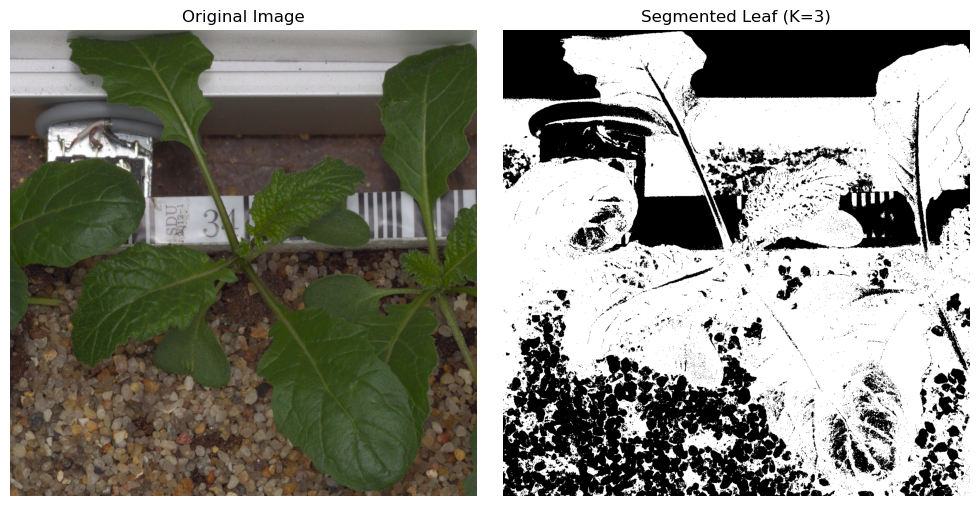

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_leaf_kmeans(image_path, k=3):
    """
    Segments a leaf from an image using K-means clustering.

    Args:
        image_path (str): Path to the input image.
        k (int): The number of clusters to form. This often needs tuning
                 depending on the image complexity and leaf color contrast.

    Returns:
        tuple: A tuple containing the original image and the segmented mask.
               Returns (None, None) if the image cannot be loaded.
    """
    try:
        # Read the image
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Could not open or find the image at {image_path}")
            return None, None

        # Convert the image to RGB (OpenCV reads in BGR)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        height, width, channels = img_rgb.shape

        # Reshape the image to a 2D array of pixels
        pixels = img_rgb.reshape((-1, 3))
        pixels = np.float32(pixels)

        # Define the K-means criteria
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

        # Apply K-means clustering
        _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        # Convert the labels back to the original image shape
        segmented_image = labels.reshape((height, width))

        # Determine the cluster likely representing the leaf
        # This is a simple heuristic based on the dominant color.
        # More robust methods might involve analyzing cluster properties
        # or requiring user input if the leaf color varies significantly.
        unique_labels, counts = np.unique(labels, return_counts=True)
        dominant_label = unique_labels[np.argmax(counts)]

        # Create a mask where the dominant cluster is white (255) and others are black (0)
        leaf_mask = np.uint8(segmented_image == dominant_label) * 255

        return img_rgb, leaf_mask

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

if __name__ == '__main__':
    # Replace 'leaf_image.jpg' with the actual path to your leaf image
    image_file = r'Leaf/51b461a5e.png'
    num_clusters = 3  # You might need to adjust this value

    original_image, segmented_mask = segment_leaf_kmeans(image_file, k=num_clusters)

    if original_image is not None and segmented_mask is not None:
        plt.suptitle("Leaf Segmentation with k-means clustering", fontsize=16)
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(segmented_mask, cmap='gray')
        plt.title(f'Segmented Leaf (K={num_clusters})')
        plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("Segmentation failed.")

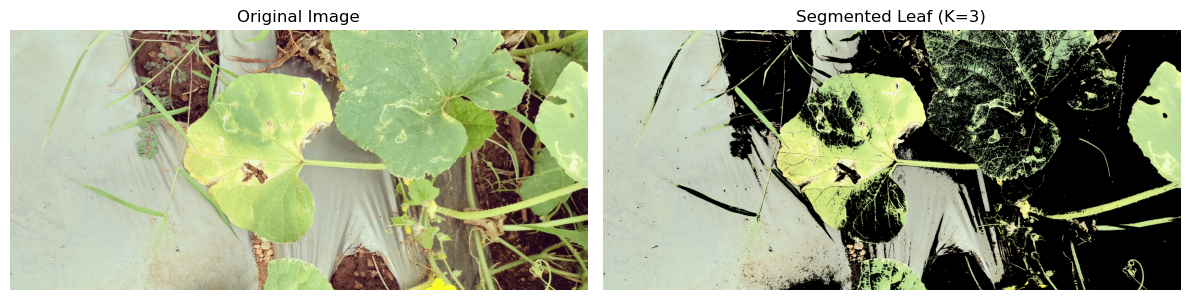

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_leaf_kmeans_with_display(image_path, k=3):
    """
    Segments a leaf from an image using K-means clustering and displays
    the segmented leaf on the original image.

    Args:
        image_path (str): Path to the input image.
        k (int): The number of clusters to form.

    Returns:
        tuple: A tuple containing the original image and the image with the
               segmented leaf highlighted. Returns (None, None) if loading fails.
    """
    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Could not open or find the image at {image_path}")
            return None, None

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        height, width, channels = img_rgb.shape
        pixels = img_rgb.reshape((-1, 3)).astype(np.float32)

        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        segmented_image = labels.reshape((height, width))

        unique_labels, counts = np.unique(labels, return_counts=True)
        dominant_label = unique_labels[np.argmax(counts)]
        leaf_mask = np.uint8(segmented_image == dominant_label)

        # Apply the mask to the original image to highlight the segmented leaf
        masked_leaf = img_rgb.copy()
        masked_leaf[leaf_mask == 0] = [0, 0, 0]  # Set non-leaf pixels to black

        return img_rgb, masked_leaf

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

if __name__ == '__main__':
    image_file = r'Leaf/IMG_20211030_123451.jpg'
    num_clusters = 3

    original_image, segmented_leaf_image = segment_leaf_kmeans_with_display(image_file, k=num_clusters)

    if original_image is not None and segmented_leaf_image is not None:
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(segmented_leaf_image)
        plt.title(f'Segmented Leaf (K={num_clusters})')
        plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("Segmentation failed.")

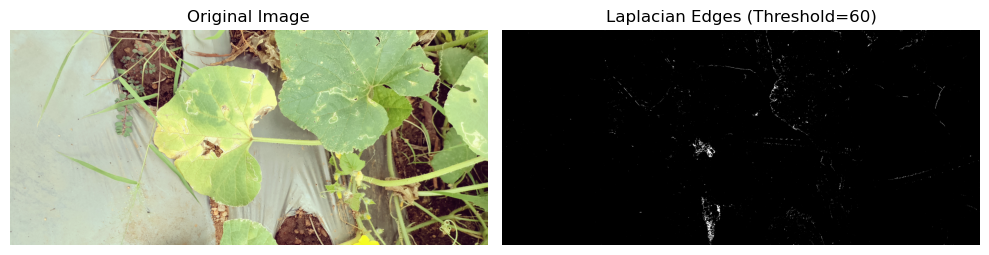

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_leaf_laplacian(image_path, laplacian_threshold=50):
    """
    Detects potential leaf regions in an image using the Laplacian operator
    and thresholding. This method highlights edges, and leaf detection
    relies on the assumption that leaves have distinct boundaries.

    Args:
        image_path (str): Path to the input image.
        laplacian_threshold (int): Threshold value to identify strong edges.
                                   Adjust this value based on image characteristics.

    Returns:
        tuple: A tuple containing the original image and the binary edge map
               (potential leaf boundaries). Returns (None, None) if loading fails.
    """
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error: Could not open or find the image at {image_path}")
            return None, None

        # Apply Laplacian operator
        laplacian = cv2.Laplacian(img, cv2.CV_64F)
        laplacian_abs = np.uint8(np.absolute(laplacian))

        # Apply a threshold to get binary edges
        _, binary_edge_map = cv2.threshold(laplacian_abs, laplacian_threshold, 255, cv2.THRESH_BINARY)

        # Optional: Apply morphological operations to refine the edges
        kernel = np.ones((3, 3), np.uint8)
        dilated_edges = cv2.dilate(binary_edge_map, kernel, iterations=2)
        eroded_edges = cv2.erode(dilated_edges, kernel, iterations=2)

        # Convert the original image to RGB for matplotlib display
        original_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

        return original_rgb, eroded_edges

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

if __name__ == '__main__':
    image_file =  r'Leaf/IMG_20211030_123451.jpg'
    threshold_value = 60  # Experiment with different threshold values

    original_image, edge_map = detect_leaf_laplacian(image_file, laplacian_threshold=threshold_value)

    if original_image is not None and edge_map is not None:
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(edge_map, cmap='gray')
        plt.title(f'Laplacian Edges (Threshold={threshold_value})')
        plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("Leaf detection failed.")

In [ ]:
import cv2
import numpy as np

def otsu_leaf_segmentation(image_path):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return

    # Resize for consistency
    image = cv2.resize(image, (600, 400))
    original = image.copy()

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Otsu's thresholding
    ret, mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Invert mask if needed (to ensure leaves are white)
    white_pixels = np.sum(mask == 255)
    black_pixels = np.sum(mask == 0)
    if black_pixels > white_pixels:
        mask = cv2.bitwise_not(mask)

    # Morphological cleaning
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Apply mask to segment the leaf
    segmented = cv2.bitwise_and(image, image, mask=mask)

    # Convert mask to 3 channels for stacking
    mask_3channel = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    # Combine for display
    combined = np.hstack((original, mask_3channel, segmented))

    # Show result
    cv2.imshow("Original | Mask (Otsu) | Segmented", combined)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
image_path =  r'Leaf/51b461a5e.png'
otsu_leaf_segmentation(image_path)

In [13]:
def watershed_segmentation(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return
    image = cv2.resize(image, (600, 400))
    original = image.copy()

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]  # Mark boundaries in red

    cv2.imshow("Watershed Segmentation", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
image_path =  r'Leaf/IMG_20211030_123451.jpg'
watershed_segmentation(image_path)


In [23]:
import cv2
import numpy as np
from collections import deque

def region_growing_segmentation(image_path, seed_point=(300, 200), threshold=10):
    # Load and resize image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return

    image = cv2.resize(image, (600, 400))
    original = image.copy()

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize mask and visited map
    mask = np.zeros_like(gray, dtype=np.uint8)
    visited = np.zeros_like(gray, dtype=bool)

    height, width = gray.shape
    seed_value = gray[seed_point[1], seed_point[0]]

    # Define 4-connected neighbors
    queue = deque([seed_point])
    visited[seed_point[1], seed_point[0]] = True
    mask[seed_point[1], seed_point[0]] = 255

    while queue:
        x, y = queue.popleft()
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < width and 0 <= ny < height and not visited[ny, nx]:
                intensity_diff = abs(int(gray[ny, nx]) - int(seed_value))
                if intensity_diff <= threshold:
                    visited[ny, nx] = True
                    mask[ny, nx] = 255
                    queue.append((nx, ny))

    # Post-processing (optional)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Apply mask
    segmented = cv2.bitwise_and(image, image, mask=mask)
    mask_3channel = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    combined = np.hstack((original, mask_3channel, segmented))

    # Display result

    cv2.waitKey(0)
    cv2.destroyAllWindows()
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow("Original | Region Grown Mask | Segmented", combined)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


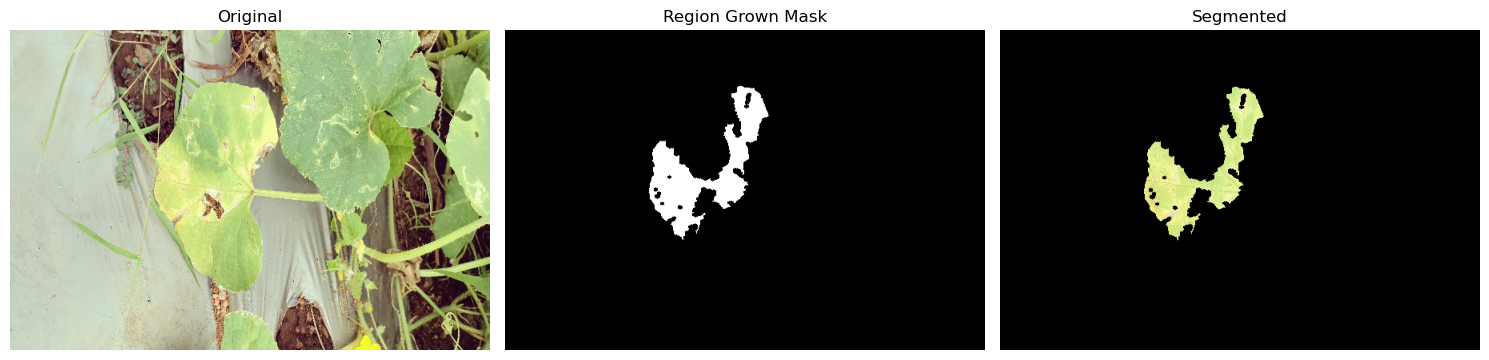

In [5]:
import cv2
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

def region_growing_segmentation(image_path, seed_point=(300, 200), threshold=10):
    # Load and resize image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return

    image = cv2.resize(image, (600, 400))
    original = image.copy()

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize mask and visited map
    mask = np.zeros_like(gray, dtype=np.uint8)
    visited = np.zeros_like(gray, dtype=bool)

    height, width = gray.shape
    seed_value = gray[seed_point[1], seed_point[0]]

    # Define 4-connected neighbors
    queue = deque([seed_point])
    visited[seed_point[1], seed_point[0]] = True
    mask[seed_point[1], seed_point[0]] = 255

    while queue:
        x, y = queue.popleft()
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < width and 0 <= ny < height and not visited[ny, nx]:
                intensity_diff = abs(int(gray[ny, nx]) - int(seed_value))
                if intensity_diff <= threshold:
                    visited[ny, nx] = True
                    mask[ny, nx] = 255
                    queue.append((nx, ny))

    # Post-processing
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Apply mask
    segmented = cv2.bitwise_and(image, image, mask=mask)
    mask_3channel = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    # Convert BGR to RGB for Matplotlib display
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    mask_rgb = cv2.cvtColor(mask_3channel, cv2.COLOR_BGR2RGB)
    segmented_rgb = cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)

    # Display using Matplotlib
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(original_rgb)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask_rgb)
    plt.title("Region Grown Mask")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(segmented_rgb)
    plt.title("Segmented")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
image_path = r'Leaf/IMG_20211030_123451.jpg'
region_growing_segmentation(image_path, seed_point=(300, 200), threshold=12)

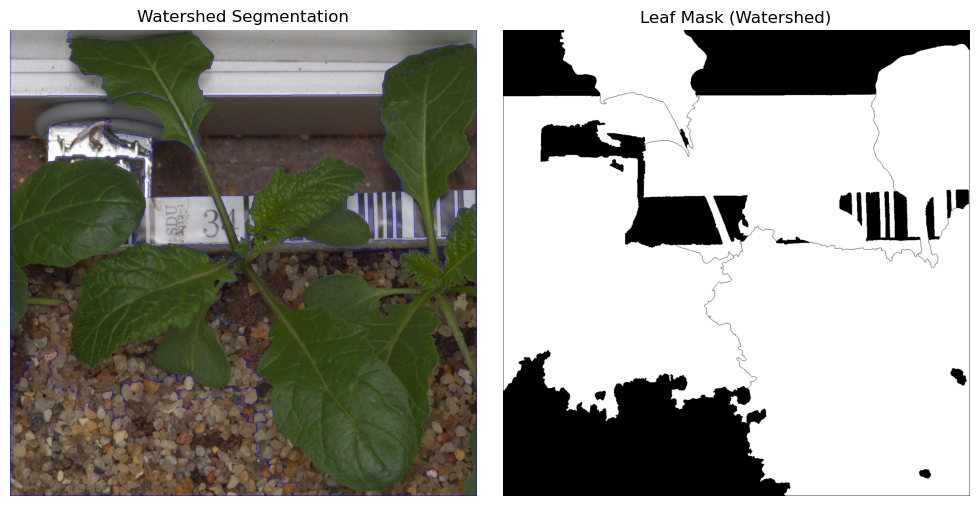

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_leaf_watershed(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Could not open or find the image at {image_path}")
            return None

        # 1. Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # 2. Thresholding to create initial markers (you might need to adjust the threshold)
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # 3. Noise removal using morphological operations
        kernel = np.ones((3, 3), np.uint8)
        opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

        # 4. Sure background area
        sure_bg = cv2.dilate(opening, kernel, iterations=3)

        # 5. Finding sure foreground area
        dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
        _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
        sure_fg = np.uint8(sure_fg)

        # 6. Finding unknown region
        unknown = cv2.subtract(sure_bg, sure_fg)

        # 7. Marker creation
        _, markers = cv2.connectedComponents(sure_fg)
        markers = markers + 1  # Add 1 so that sure background is not 0

        # 8. Mark the region of unknown with 0
        markers[unknown == 255] = 0

        # 9. Apply watershed
        markers = cv2.watershed(img, markers)
        img[markers == -1] = [255, 0, 0]  # Mark watershed boundaries in red

        # Create a mask from the markers
        leaf_mask = np.zeros_like(gray, dtype=np.uint8)
        leaf_mask[markers > 1] = 255  # Mark leaf regions (markers > 1) as white

        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB), leaf_mask

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

if __name__ == '__main__':
    image_file = r'Leaf/51b461a5e.png'
    segmented_image, leaf_mask = segment_leaf_watershed(image_file)

    if segmented_image is not None and leaf_mask is not None:
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(segmented_image)
        plt.title('Watershed Segmentation')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(leaf_mask, cmap='gray')
        plt.title('Leaf Mask (Watershed)')
        plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("Watershed segmentation failed.")

In [11]:
from collections import deque

def region_growing_segmentation(image_path, seed_point=(300, 200), threshold=12):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return

    image = cv2.resize(image, (600, 400))
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    mask = np.zeros_like(gray, dtype=np.uint8)
    visited = np.zeros_like(gray, dtype=bool)

    height, width = gray.shape
    seed_value = gray[seed_point[1], seed_point[0]]

    queue = deque([seed_point])
    visited[seed_point[1], seed_point[0]] = True
    mask[seed_point[1], seed_point[0]] = 255

    while queue:
        x, y = queue.popleft()
        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < width and 0 <= ny < height and not visited[ny, nx]:
                if abs(int(gray[ny, nx]) - int(seed_value)) <= threshold:
                    visited[ny, nx] = True
                    mask[ny, nx] = 255
                    queue.append((nx, ny))

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    segmented = cv2.bitwise_and(image, image, mask=mask)

    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    segmented_rgb = cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle("Region Growing Segmentation", fontsize=16)

    ax[0].imshow(original_rgb)
    ax[0].set_title("Original")
    ax[0].axis("off")

    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title("Region Mask")
    ax[1].axis("off")

    ax[2].imshow(segmented_rgb)
    ax[2].set_title("Segmented Leaf")
    ax[2].axis("off")

    plt.tight_layout()
    plt.show()


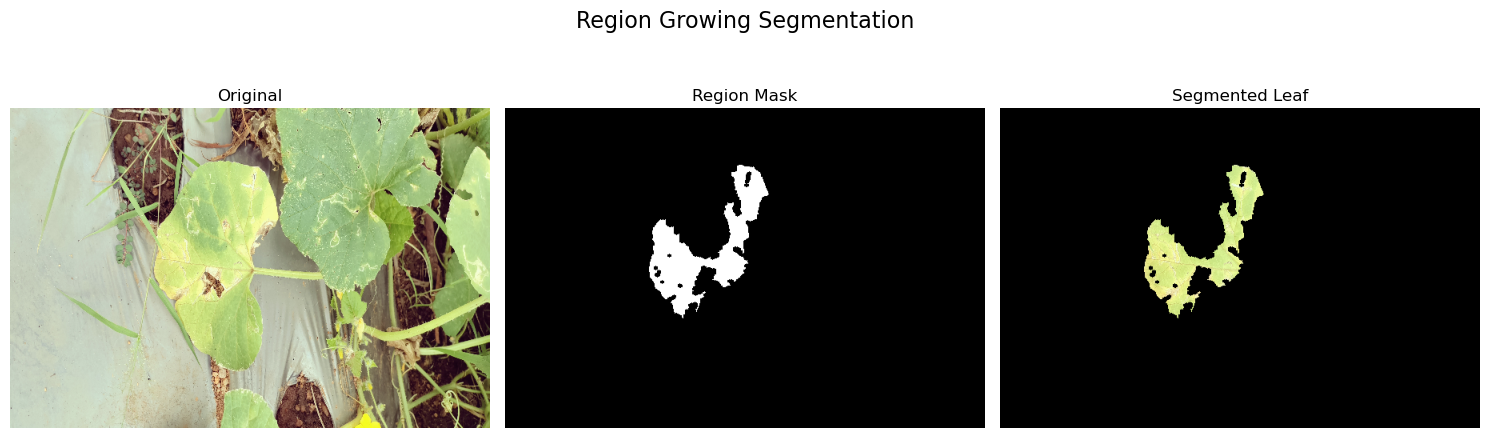

In [13]:
image_path = r'Leaf/IMG_20211030_123451.jpg'
region_growing_segmentation(image_path, seed_point=(300, 200), threshold=12)

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def watershed_segmentation(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return

    image = cv2.resize(image, (600, 400))
    original = image.copy()

    # Grayscale and threshold
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labelling
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    # Apply Watershed
    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]  # Red boundary

    # Convert for matplotlib
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    segmented_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = markers.astype(np.uint8)
    mask = cv2.normalize(mask, None, 0, 255, cv2.NORM_MINMAX)

    # Matplotlib display
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle("Watershed Segmentation", fontsize=16)

    ax[0].imshow(original_rgb)
    ax[0].set_title("Original")
    ax[0].axis("off")

    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title("Markers/Mask")
    ax[1].axis("off")

    ax[2].imshow(segmented_rgb)
    ax[2].set_title("Segmented Leaf")
    ax[2].axis("off")

    plt.tight_layout()
    plt.show()


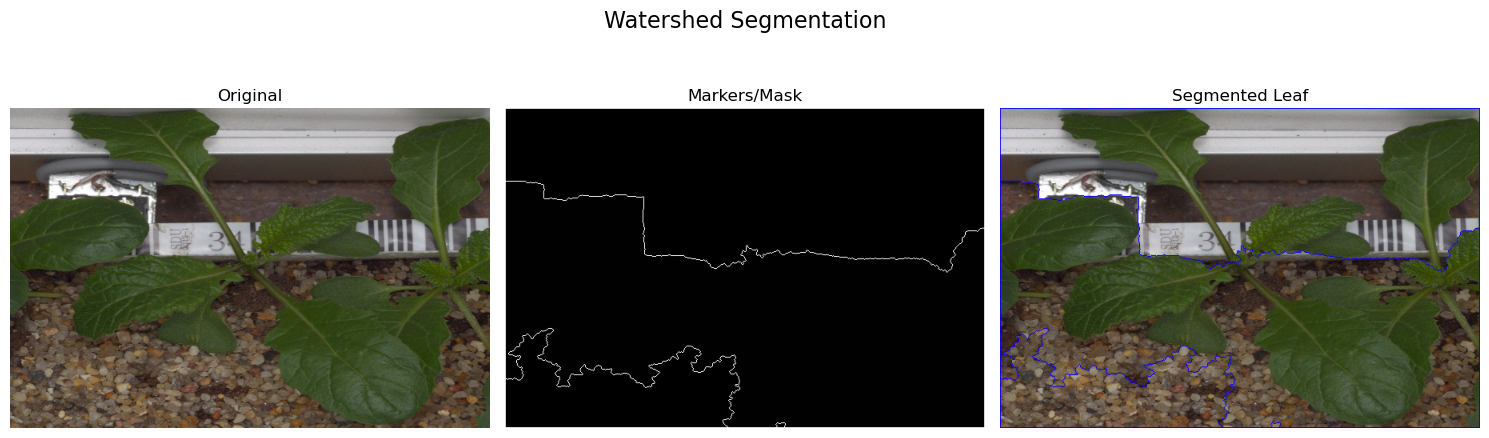

In [21]:
image_path = r'Leaf/51b461a5e.png'
watershed_segmentation(image_path)